# Torch Datasets
Create a class for custum datasets

In [143]:
import os
import torch
from PIL import Image
from torch.utils.data import Dataset

class ISICDataset_seg(Dataset):
    '''ISIC images/masks dataset'''
    def __init__(self, folder, transform=None):
        '''
        Args:
            folder (string): Directory with images and masks folders
            transform (callable, optional): Optional transform to be applied on a sample.
        '''
        images_folder = folder + '/images'
        masks_folder = folder + '/masks'
        
        images_filenames = sorted(os.listdir(images_folder))
        masks_filenames = sorted(os.listdir(masks_folder))
        
        self.images_paths = [os.path.join(images_folder, name) for name in images_filenames]
        self.masks_paths = [os.path.join(masks_folder, name) for name in masks_filenames]
        
        self.transform = transform
    
    def __len__(self):
        return len(self.images_paths)
    
    def __getitem__(self, index):
        if torch.is_tensor(index):
            index = index.tolist()

        image = Image.open(self.images_paths[index])
        mask = Image.open(self.masks_paths[index])
        
        sample = {'image': image, 'mask': mask}

        if self.transform:
            for t in self.transform:
                sample['image'] = t(sample['image'])
                sample['mask'] = t(sample['mask'])
                t._update()
                
        return sample

In [481]:
import numpy as np

class ISICDataset_clf(Dataset):
    '''ISIC nevus/melanomas dataset'''
    def __init__(self, folder, transform=None, shuffle=True):
        '''
        Args:
            folder (string): Directory with nevus and melanoma folders
            transform (callable, optional): Optional transform to be applied on a sample.
        '''
        nevus_folder = folder + '/nevus'
        melanoma_folder = folder + '/melanoma'
        
        nevus_filenames = sorted(os.listdir(nevus_folder))
        melanoma_filenames = sorted(os.listdir(melanoma_folder))
        
        nevus_paths = [os.path.join(nevus_folder, name) for name in nevus_filenames]
        melanoma_paths = [os.path.join(melanoma_folder, name) for name in melanoma_filenames]
        
        self.filepath = melanoma_paths + nevus_paths
        self.labels = torch.zeros(len(self.filepath))
        self.labels[:len(melanoma_paths)] = 1
        
        if shuffle:
            inx = torch.randperm(len(self.labels))
            self.labels = self.labels[inx]
            self.filepath = np.array(self.filepath)[inx]
            
        self.transform = transform
    
    def __len__(self):
        return len(self.labels)
    
    def __getitem__(self, index):
        if torch.is_tensor(index):
            index = index.tolist()
            
        image = Image.open(self.filepath[index])
        label = self.labels[index]
        
        sample = {'image': image, 'label': label}

        if self.transform:
            for t in self.transform:
                sample['image'] = t(sample['image'])
                t._update()
        
        return sample

In [511]:
# %run '3.3.Transformers.ipynb'

# transform = [
#     Resize((64,64)),
#     RandAffine(),
#     RandHFlip(),
#     AdjBrightness(),
#     AdjContrast(),
#     AdjSaturation(0,1.5),
#     AdjHue(-0.1, 0.1)
# ]

# ds_seg = ISICDataset_seg('data/raw/segmentation/train', transform)
# ds_clf = ISICDataset_clf('data/raw/classification/train', transform)

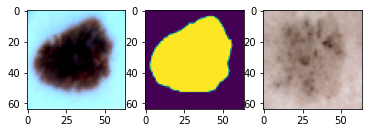

In [519]:
# import matplotlib.pyplot as plt

# sample = ds_seg[0]

# fig, ax = plt.subplots(1,3)
# ax[0].imshow(sample['image'])
# ax[1].imshow(sample['mask'])
# ax[2].imshow(ds_clf[0]['image'])

# plt.show()